Degree sequence of initial graph= [410, 355, 345, 286, 272, 258, 240, 233, 189, 186, 182, 170, 152, 145, 136, 127, 121, 117, 115, 110, 109, 100, 99, 96, 95, 94, 93, 92, 89, 88, 84, 83, 82, 81, 79, 78, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 67, 66, 65, 65, 64, 64, 63, 62, 61, 61, 60, 60, 59, 58, 58, 57, 57, 56, 56, 55, 55, 54, 54, 53, 53, 52, 52, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 47, 47, 47, 46, 46, 46, 45, 45, 45, 44, 44, 44, 43, 43, 43, 43, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24,

assortativity coefficient of the initial graph= 0.00011313911801330707
Average degree, 1st computation= 4.427828175026681
Average degree, 2nd computation= 4.427828175026681
Maximum degree= 410
Number of nodes in the initial graph= 14992
Number of nodes in giant component= 14991
percentage of nodes in giant component= 99.99332977588047
Cycle nr. 0
r_target 2.1836826739829928e-17
counter for rewiring= 1305565
assortativity coefficient of the rewired graph= -0.03742259167221939
Cycle nr. 1
r_target 2.1836826739829928e-17
counter for rewiring= 1305624
assortativity coefficient of the rewired graph= -0.03137566149747781
Cycle nr. 2
r_target 2.1836826739829928e-17
counter for rewiring= 1305465
assortativity coefficient of the rewired graph= -0.03605907956131594
Cycle nr. 3
r_target 2.1836826739829928e-17
counter for rewiring= 1305627
assortativity coefficient of the rewired graph= -0.037682616035097184
Cycle nr. 4
r_target 2.1836826739829928e-17
counter for rewiring= 1305521
assortativity co

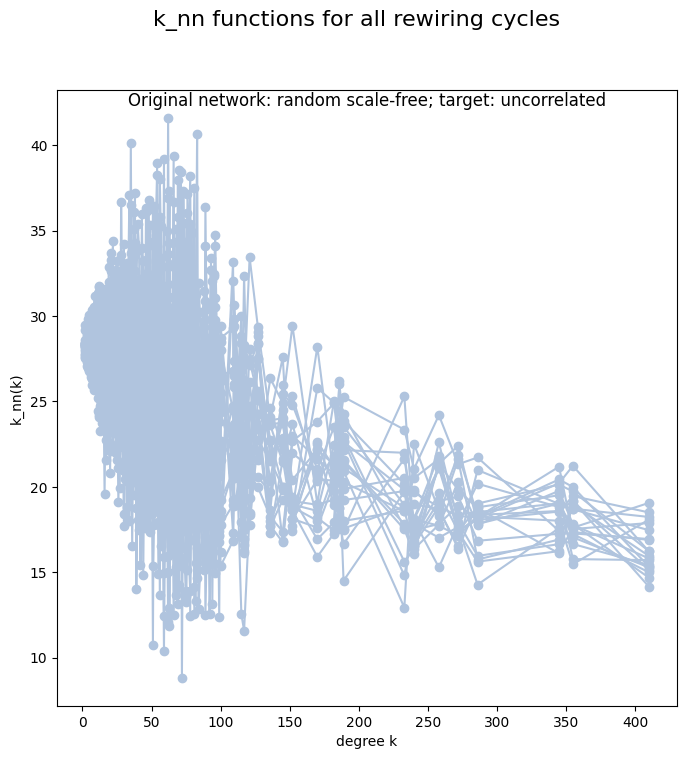

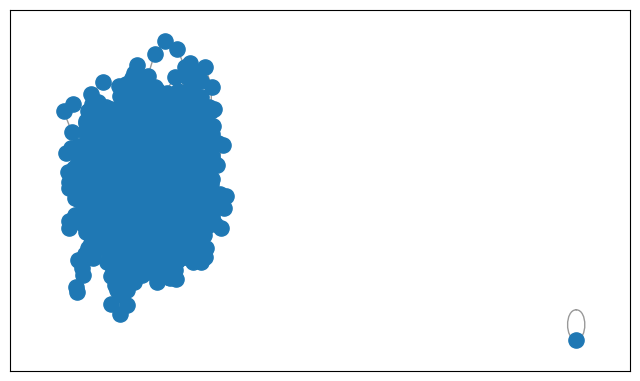

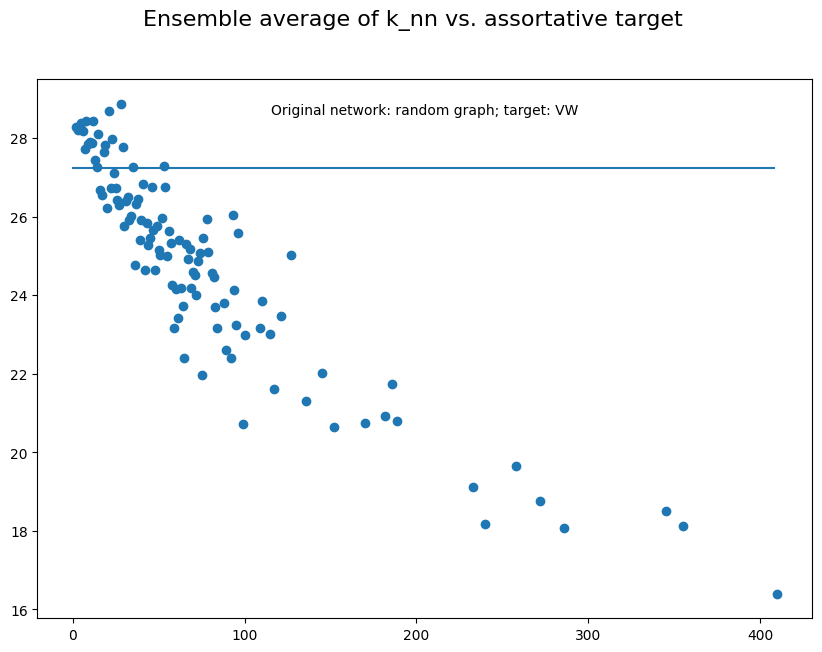

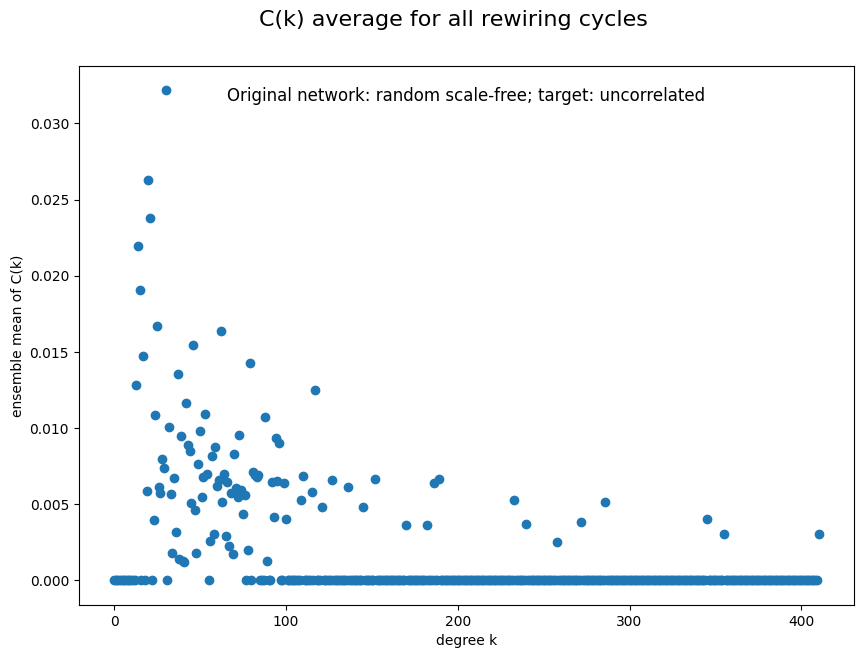

In [19]:
import heapq
import math
import random
from itertools import chain, combinations, zip_longest
from operator import itemgetter

import networkx as nx
from networkx.utils import py_random_state, random_weighted_sample

__all__ = [
    "configuration_model",
    "directed_configuration_model",
    "expected_degree_graph",
    "havel_hakimi_graph",
    "directed_havel_hakimi_graph",
    "degree_sequence_tree",
    "random_degree_sequence_graph",
]

chaini = chain.from_iterable #from itertools

def _to_stublist_kmin(degree_sequence,kmin):
    return list(chaini([n] * d for n, d in enumerate(degree_sequence,start=kmin)))
def _to_stublist(degree_sequence):
    #Returns a list of degree-repeated node numbers.

    return list(chaini([n] * d for n, d in enumerate(degree_sequence)))

def _configuration_model(
    deg_sequence, create_using, directed=False, in_deg_sequence=None, seed=None
):
    #Function for generating either undirected or directed configuration model graphs.

    n = len(deg_sequence)
    G = nx.empty_graph(n, create_using)
    # If empty, return the null graph immediately.
    if n == 0:
        return G
    if directed:
        pairs = zip_longest(deg_sequence, in_deg_sequence, fillvalue=0)        
        out_deg, in_deg = zip(*pairs)
        out_stublist = _to_stublist(out_deg)
        in_stublist = _to_stublist(in_deg)

        seed.shuffle(out_stublist)
        seed.shuffle(in_stublist)
    else:
        stublist = _to_stublist(deg_sequence)
        # Choose a random balanced bipartition of the stublist, which
        # gives a random pairing of nodes. In this implementation, we
        # shuffle the list and then split it in half.
        n = len(stublist)
        half = n // 2
        random.seed(seed)
        random.shuffle(stublist)
        #seed.shuffle(stublist)
        #The order of the list is rearranged and then the list is split in half.
        out_stublist, in_stublist = stublist[:half], stublist[half:]
        for (u,v) in zip(out_stublist, in_stublist):
                G.add_edge(u,v)
    return G


#[docs]@py_random_state(2)
def configuration_model(deg_sequence, create_using=None, seed=None):
    #Defines the function for the configuration of the network starting from the degree sequence.
    #The returned graph is a multigraph, which may have parallel
    #edges. To remove any parallel edges from the returned graph:

    #>>> G = nx.Graph(G)

    #Similarly, to remove self-loops:

    #>>> G.remove_edges_from(nx.selfloop_edges(G))

    # Checks for good initial conditions according to well-known criteria.  
    #  if sum(deg_sequence) % 2 != 0:
    #  msg = "Invalid degree sequence: sum of degrees must be even, not odd"
    #  raise nx.NetworkXError(msg)
    # In practice, a MultiGraph better respects the construction. 
    G = nx.empty_graph(0, create_using, default=nx.MultiGraph)
    if G.is_directed():
        raise nx.NetworkXNotImplemented("not implemented for directed graphs")

    G = _configuration_model(deg_sequence, G, seed=seed)

    return G
#return normalized degree distribution

def degree_dist(G):
    degree_hist = nx.degree_histogram(G) 
    degree_hist = np.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    return degree_prob

def vazquez(max_degree,r):
    import numpy as np
    P=np.zeros([max_degree+1, max_degree+1])
    M=np.eye(max_degree+1)
    for h in range(kmin,max_degree +1):
     for k in range(kmin,max_degree +1):
      P[h,k]=(1-r)*((h*probability_seq[h])/aver_degree)+r*M[h,k]
    return P

def matrix_e(max_degree):
    import numpy as np
    delta=2.2
    e1=np.zeros([max_degree, max_degree])
    e1_norm=np.zeros([max_degree, max_degree])
    e1_norm_tilde=np.zeros([max_degree+1, max_degree+1])
    PP1=np.zeros([max_degree+1, max_degree+1])
    sum_e_tilde=np.zeros(max_degree+1)
    norm1=0
    for j in range(kmin-1,max_degree):
        for k in range(kmin-1, max_degree):
            e1[j,k]=1.0/(1+j+k)**delta
            norm1+=e1[j,k]
    e1_norm=np.divide(e1,norm1)
    for h in range(kmin,max_degree+1):
        for k in range(kmin,max_degree+1):
            e1_norm_tilde[h,k]=e1_norm[h-1,k-1]
    for k in range(kmin,max_degree+1):
        for j in range(kmin,max_degree+1):
            sum_e_tilde[k]+=e1_norm_tilde[k,j]
    for h in range(kmin,max_degree+1):
        for k in range(kmin,max_degree+1):
            PP1[h,k]=e1_norm_tilde[h,k]/sum_e_tilde[k]
    return PP1
    
    
    

def assortative_bm(max_degree, lam, gamma):
    import numpy as np
    P0=np.zeros([max_degree+1, max_degree+1])
    P1=np.zeros([max_degree+1, max_degree+1])
    P=np.zeros([max_degree+1, max_degree+1])
    C=np.zeros(max_degree+1)
    for h in range(kmin, max_degree+1):
        P0[h,h]=1
    for h in range(kmin,max_degree + 1):
        for k in range(kmin, max_degree+1):
            if h<k :
                P0[h,k]= pow(abs(h-k), -lam)
    for h in range(kmin ,max_degree + 1):
        for k in range(kmin, max_degree+1):
            if h>k :
                P0[h,k] = P0[k,h]*(pow(h,1-gamma)/pow(k,1-gamma))
    for k in range (kmin, max_degree+1):
        for h in range(kmin,max_degree+1):
            C[k] += P0[h,k]
    Cmax= np.max(C)
    for h in range(kmin ,max_degree + 1):
        for k in range(kmin, max_degree+1):
            if h==k:
                P1[h,k]=Cmax -C[k]
            else:
                P1[h,k]=P0[h,k]
                
    P= np.divide(P1, (Cmax-1))
    return P

def conn_target(G, gamma, input_method):
    deg_sequence=sorted((d for n, d in G.degree()), reverse=True)
    max_degree=max(deg_sequence)
    lam =1
    r=0.0
    Phk=np.zeros([max_degree+1,max_degree+1])
    knn_t = np.zeros([max_degree+1])
    if input_method == 'assortative_bm':
     Phk =assortative_bm(max_degree, lam, gamma)
 
    elif input_method == 'vazquez':
     Phk=vazquez(max_degree,r)
 
    elif input_method == 'matrix_e':
     Phk=matrix_e(max_degree)
    for k in range(kmin, max_degree+1):
     for h in range(kmin,max_degree+1):
      knn_t[k] += h * Phk[h,k]
    
    knn_t2=knn_t[knn_t != 0.0]
    return knn_t2
    

   
   
def random_reference(G, gamma,input_method, niter, connectivity=True, seed=None):
    import random
    rcount = 0 
    if len(G) < 4:
        raise nx.NetworkXError("Graph has fewer than four nodes.")
    if len(G.edges) < 2:
        raise nx.NetworkXError("Graph has fewer that 2 edges")

    from networkx.utils import cumulative_distribution, discrete_sequence

    local_conn = nx.connectivity.local_edge_connectivity
    deg_sequence=sorted((d for n, d in G.degree()), reverse=True)
    sum_of_degrees=sum(deg_sequence)

    probability_seq= degree_dist(G)

    aver_degree= 2*G.number_of_edges () / float (G1.number_of_nodes ()) #computes the average degree
    
    k_aver=0
    #for x in probability_seq:
    for count,x in enumerate(probability_seq):
         k_aver += x * count

    max_degree=max(deg_sequence)
    
    lam =1 #0.5
    r=0.0
    M=np.eye(max_degree+1)
    Phk=np.zeros([max_degree+1,max_degree+1])
 
    if input_method == 'assortative_bm':
     Phk =assortative_bm(max_degree, lam, gamma)
     probability_seq=seqn
 
    elif input_method == 'vazquez':
     Phk=vazquez(max_degree,r)
 
    elif input_method == 'matrix_e':
     Phk=matrix_e(max_degree)
    
    
    
   
    e0=np.zeros([max_degree+1,max_degree+1])
    for i in range(kmin-1,max_degree):
        for j in range(kmin-1,max_degree):
          e0[i,j]=(Phk[i+1,j+1]*(j+1)*probability_seq[j+1])/aver_degree
    
    Q=np.zeros(max_degree)
    sum_Q=0
    sum_Q2=0
    r_num=0
    for k in range(kmin-1,max_degree):
        for j in range(kmin-1,max_degree):
            Q[k]+=e0[k,j]
    for k in range(kmin-1,max_degree):
        sum_Q+=k*Q[k]
        sum_Q2+=k*k*Q[k]
    sigma_Q2=sum_Q2-sum_Q**2
    for k in range(kmin-1,max_degree):
        for j in range(kmin-1,max_degree):
            r_num+=k*j*(e0[k,j]-Q[k]*Q[j])
    r_target=r_num/sigma_Q2
    print("r_target",r_target)

    #G = G.copy()
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = cumulative_distribution(degrees)  # cdf of degree
    nnodes = len(G)
    nedges = nx.number_of_edges(G)
   # print("Number of edges=", nedges)
    niter = niter * nedges
    ntries = int(nnodes * nedges / (nnodes * (nnodes - 1) / 2))
    #print("Ntries=", ntries)
    swapcount = 0
    
    for i in range(niter):
         n = 0
         while n < ntries:
            # pick two random edges without creating edge list
            # choose source node indices from discrete distribution
            (ai, ci) = discrete_sequence(2, cdistribution=cdf, seed=seed)
            #(ai,ci)= discrete_sequence(2,degrees,seed=seed)
            if ai == ci:
                continue  # same source, skip
            a = keys[ai]  # convert index to label
            c = keys[ci]
            # choose target uniformly from neighbors
            b = random.choice(list(G.neighbors(a)))
            d = random.choice(list(G.neighbors(c)))
            if b in [a, c, d] or d in [a, b, c]:
                continue  # all vertices should be different

            # don't create parallel edges
            if (d not in G[a]) and (b not in G[c]):
                ai = G.degree(a)-1
                ci = G.degree(c)-1 
                bi = G.degree(b)-1 
                di = G.degree(d)-1 
                E1=e0[ai,bi]*e0[ci,di]
                E2=e0[ai,ci]*e0[bi,di]
                if (E1 == 0):
                  if (G.has_edge(a,c)) or (G.has_edge(b,d)):
                     continue
                  G.add_edge(a, c)
                  G.add_edge(b, d)
                  G.remove_edge(a, b)
                  G.remove_edge(c, d)
                # print("swap for a,b,c,d =",a,b,c,d)
                  rcount +=1
                elif (E1 >0):
                    P=E2/E1
                    if (P>=1):
                        if (G.has_edge(a,c)) or (G.has_edge(b,d)):
                         continue
                        G.add_edge(a, c)
                        G.add_edge(b, d)
                        G.remove_edge(a, b)
                        G.remove_edge(c, d)
                        rcount +=1
                    elif random.random() < P:
                        if (G.has_edge(a,c)) or (G.has_edge(b,d)):
                         continue
                        G.add_edge(a, c)
                        G.add_edge(b, d)
                        G.remove_edge(a, b)
                        G.remove_edge(c, d)
                        rcount +=1
                # Check if the graph is still connected
                #if connectivity and local_conn(G, a, b) == 0:
                    # Not connected, revert the swap
                 #   G.remove_edge(a, c)
                 #   G.remove_edge(b, d)
                 #  G.add_edge(a, b)
                 #   G.add_edge(c, d)
                #else:
                 #   swapcount += 1
                 #   break
            n += 1
    print("counter for rewiring=",rcount)
    return G
   

# progr princip di 'UNICO_Newman_rewiring_knn_BM_VAZ_correction'
# in cui scelgo fra 3 opzioni: SF, RND, BA
# la prima usa la funz 'configuration_model', dopo aver gen la deg sequence
# la generaz della deg seq è lasciata fare in ogni caso

import numpy as np
import random
from scipy.integrate import odeint
import networkx as nx
from scipy.misc import derivative
from numpy import diff
N=15000
num_cycles=20
seq =[]
gamma=2.5
n=800
seqn=[]
s1=[]
kmin=2

for i in range(kmin,n):
    seqel = 1/pow(i,gamma)
    seq.append(seqel)
norm=sum(seq)
seqn=np.divide(seq,norm)
for p in seqn:
        p1 =p *N
        pint= int(p1)
        pf=p1-int(p1)
        if random.random() < pf:
            q=pint +1
        else: q=pint
        s1.append(q)
#print("s1=",s1)
list_of_nodes = _to_stublist_kmin(s1, kmin)

# le prossime due istruzioni si commentano se si usano grafi random o BA
# invece i due cicli preced. si lasciano eseguire anche in quel caso

#print("List of nodes from random hubs sequence =", list_of_nodes)
G1 = configuration_model(list_of_nodes,create_using=None, seed=123456) #OPZIONE 1

#These two instructions are meant to be used for setting either Barabasi-Albert or random graphs. 
#G1=nx.barabasi_albert_graph(N,2) #OPTION 2
#G1 = nx.gnp_random_graph(4000, 0.001, seed=1866642) #OPTION 3

# Next instructions will be applied to the somehow generated graph G1 

deg_sequence1=sorted((d for n, d in G1.degree()), reverse=True)
sum_of_degrees1=sum(deg_sequence1)
print("Degree sequence of initial graph=",deg_sequence1)
ass1=nx.degree_assortativity_coefficient(G1)
print("assortativity coefficient of the initial graph=", ass1)
probability_seq= degree_dist(G1)
#print("Probability sequence=", probability_seq)
aver_degree= 2*G1.number_of_edges () / float (G1.number_of_nodes ())
print("Average degree, 1st computation=", aver_degree)
k_aver=0
for count,x in enumerate(probability_seq):
         k_aver += x * count
print("Average degree, 2nd computation=",k_aver)
max_degree=max(deg_sequence1)
print("Maximum degree=", max_degree)

print("Number of nodes in the initial graph=", len(G1))
#print("List of degrees=", G1.degree())
lcc = G1.subgraph(max(nx.connected_components(G1), key=len)) 
print("Number of nodes in giant component=",len(lcc)) 
f=(len(lcc)/len(G1)) * 100 
print("percentage of nodes in giant component=", f)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
knni=nx.average_degree_connectivity(G1, source='in+out', target='in+out', nodes=None, weight=None)#initial knn
knni2= {k: v for k, v in knni.items() if v}
knn1i= dict(sorted(knni2.items()))
ktot=np.zeros(len(list(knn1i.values())))
r_list=[]

input_method= 'vazquez' #assortative_bm #vazquez #matrix_e

clust1=np.zeros(max_degree+1)
clust2=np.zeros(max_degree+1)
dd1=np.zeros(max_degree+1)

for i in range(num_cycles):
   print("Cycle nr.", i)
   G2= random_reference(G1, gamma, input_method, niter=10, connectivity=True, seed=None)
   ass=nx.degree_assortativity_coefficient(G2)
   r_list.append(ass)
   print("assortativity coefficient of the rewired graph=", ass)
   deg_sequence2=sorted((d for n, d in G2.degree()), reverse=True)
  # print("Maximum degree of rewired graph =", np.max(deg_sequence2))

  # G2=G1.copy()
    
   # for each node of the graph, compute clustering
   # record in the variable dd1 that a node of degree k has been encountered
   G3=nx.Graph(G2)
   for node in G3:
    k=G3.degree(node)
    c=nx.clustering(G3, node)   
    clust1[k]=+c
    dd1[k]=+1
 
   knn=nx.average_degree_connectivity(G2, source='in+out', target='in+out', nodes=None, weight=None)
   knn1= dict(sorted(knn.items()))
   knn2 = {k: v for k, v in knn1.items() if v}
   #ax2 = fig.add_subplot(axgrid[3:, :4])
   #print(knn1)
   kk = list(knn2.values())
   kk2= list(knn2.keys())
   for j in range(0,len(kk)):
     ktot[j]+=kk[j]
   plt.plot(list(knn2.keys()),list(knn2.values()), **{'color': 'lightsteelblue', 'marker': 'o'})
   plt.suptitle('k_nn functions for all rewiring cycles', y =0.98, fontsize=16)
   plt.title('Original network: random scale-free; target: uncorrelated', y=0.96, fontsize=12)
 #plt.title('Original network: Barabasi-Albert 2; target: VW')
    #plt.title('Original network: uncorrelated scale-free, gamma=2.5; target: BM1')
   plt.ylabel('k_nn(k)')
   plt.xlabel('degree k')
   plt.savefig('Cloud_knn_functions.png')


mean_r=np.average(r_list)
print("mean of r",mean_r)
sigma_r=np.std(r_list)
print("sigma of r",sigma_r)    
knn_target= conn_target(G2,gamma, input_method)
#print ("knn_target=", knn_target)
deg_sequence2=sorted((d for n, d in G2.degree()), reverse=True)
max_degree2=max(deg_sequence2)
kvec=np.linspace(1,len(knn_target),len(knn_target))
lcc2 = G2.subgraph(max(nx.connected_components(G2), key=len)) #giant component
print("Number of nodes in giant component after the last rewiring=",len(lcc2)) #number of nodes of subgraph of giant component
f=(len(lcc2)/len(G2)) * 100 #percentage of nodes in giant component 
print("percentage of nodes in giant component after the last rewiring=", f)
fig=plt.figure(figsize=(8,8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G2, seed=10396953)
nx.draw_networkx_nodes(G2, pos, ax=ax0, node_size=120)
nx.draw_networkx_edges(G2, pos, ax=ax0, alpha=0.4)
kmean=np.divide(ktot,num_cycles)
fig1 = plt.figure(figsize=(10,7))
plt.scatter(kk2,kmean)
plt.plot(knn_target)
plt.suptitle('Ensemble average of k_nn vs. assortative target', y =0.98, fontsize=16)
plt.title('Original network: random graph; target: VW', y =0.92, fontsize=10)
plt.savefig('Ensemble_average_knn.png')
 #plt.title('Original network: Barabasi-Albert 2; target: VW')
#plt.title('Original network: uncorrelated scale-free, gamma=2.5; target: BM1')

#nx.write_graphml(G2, "Assortative.graphml")
#fig2 = plt.figure(figsize=(10,7))
#plt.scatter(kvec,knn_target)
#plt.title('Knn target calculation')



# compute the average of C(k) for every node of degree k encountered over all rewiring cycles
# such encounters are counted in the variable dd1
for k in range(1,max_degree+1):
    if (dd1[k]>0):
     clust2[k]=np.divide(clust1[k],dd1[k])

# plot the graph of C(k)
fig3 = plt.figure(figsize=(10,7))
plt.plot(clust2,'o')
plt.suptitle('C(k) average for all rewiring cycles', y =0.96, fontsize=16)
plt.title('Original network: random scale-free; target: uncorrelated', y=0.92, fontsize=12)
plt.ylabel('ensemble mean of C(k)')
plt.xlabel('degree k')
plt.savefig('C_average_function.png')



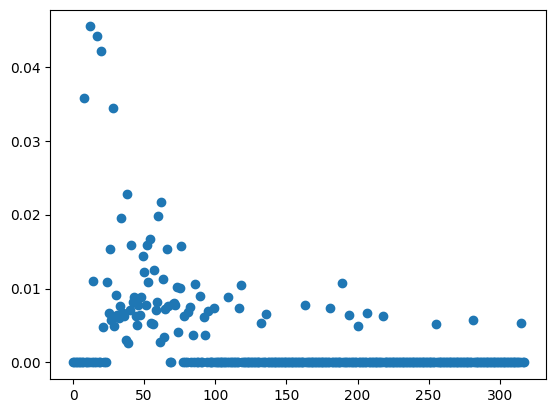

In [10]:
plt.plot(clust2,'o')

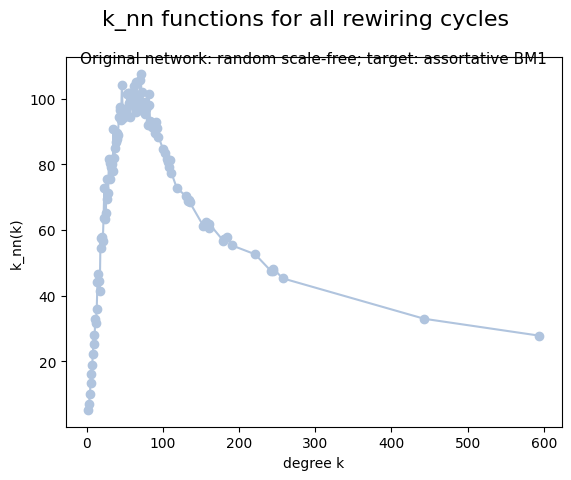

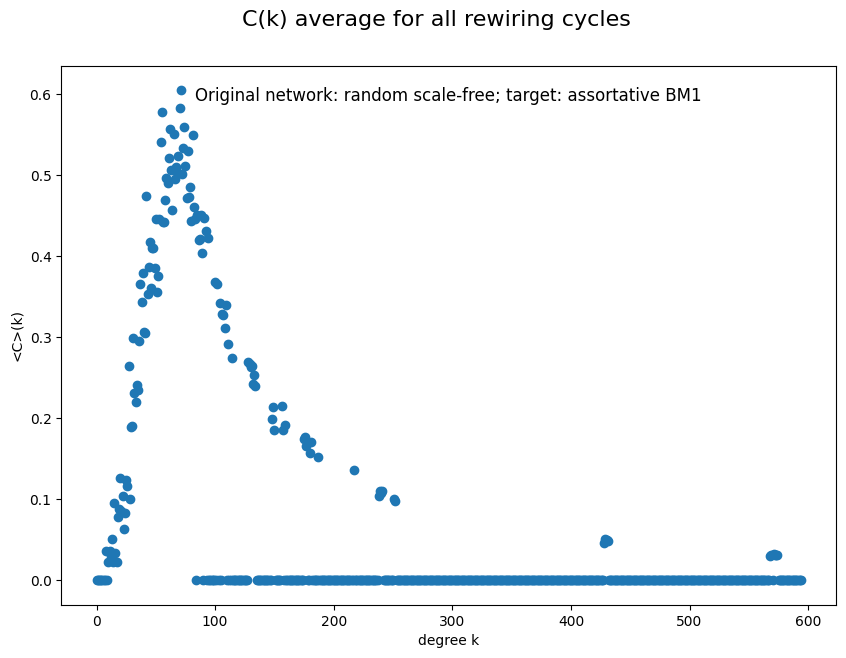

In [15]:
plt.plot(list(knn2.keys()),list(knn2.values()), **{'color': 'lightsteelblue', 'marker': 'o'})
plt.suptitle('k_nn functions for all rewiring cycles', y =0.98, fontsize=16)
plt.title('Original network: random scale-free; target: assortative BM1', y=0.96, fontsize=11)
plt.ylabel('k_nn(k)')
plt.xlabel('degree k')
plt.savefig('Cloud_knn_functions.png')


fig4 = plt.figure(figsize=(10,7))
plt.plot(clust2,'o')
plt.suptitle('C(k) average for all rewiring cycles', y =0.96, fontsize=16)
plt.title('Original network: random scale-free; target: assortative BM1', y=0.92, fontsize=12)
plt.ylabel('<C>(k)')
plt.xlabel('degree k')
plt.savefig('C_average_function.png')